In [14]:
import numpy as np
import matplotlib.pyplot as plt

from mcop.simulate_paths import simulate_gbm_paths
from mcop.payoffs import european_call, european_put
from mcop.pricing import mc_price

In [15]:
S0 = 100.0
K = 100.0
r = 0.05
q = 0.0
sigma = 0.2
T = 1.0

n_steps = 252
n_paths = 200_000
seed = 123

In [16]:
paths = simulate_gbm_paths(S0, r, sigma, T, n_steps, n_paths, q=q, seed=seed, antithetic=True)
paths.shape

(200000, 253)

In [17]:
call_payoffs = european_call(paths, K)
put_payoffs = european_put(paths, K)

call_price, call_se, call_lo, call_hi = mc_price(call_payoffs, r, T)
put_price, put_se, put_lo, put_hi = mc_price(put_payoffs, r, T)

call_price, call_se, (call_lo, call_hi), put_price, put_se, (put_lo, put_hi)

(10.409634174860638,
 0.0328339469896338,
 (10.34528082129066, 10.473987528430618),
 5.544529252209392,
 0.0193140645677009,
 (5.506674381261617, 5.5823841231571665))

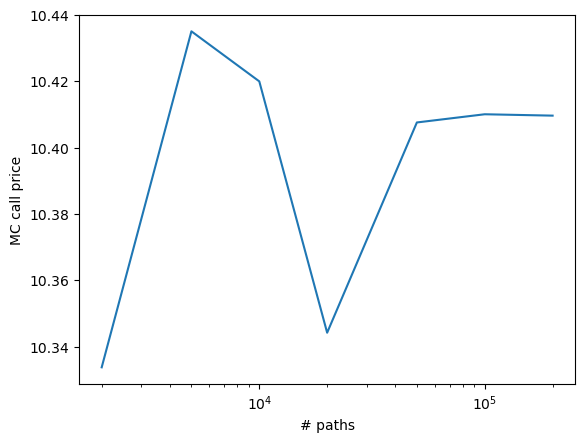

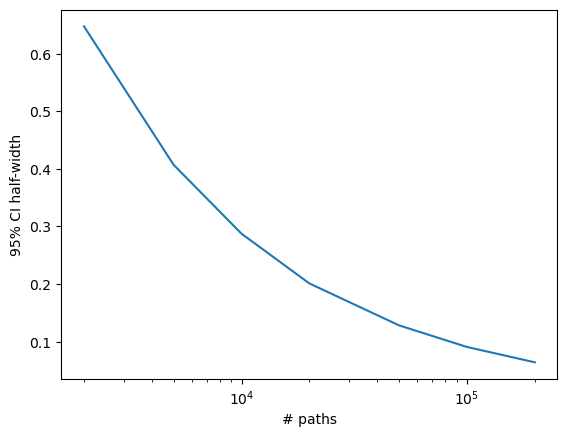

In [18]:
path_grid = [2_000, 5_000, 10_000, 20_000, 50_000, 100_000, 200_000]

prices = []
ses = []

for n in path_grid:
    p = simulate_gbm_paths(S0, r, sigma, T, n_steps, n, q=q, seed=seed, antithetic=True)
    pay = european_call(p, K)
    price, se, lo, hi = mc_price(pay, r, T)
    prices.append(price)
    ses.append(se)

plt.figure()
plt.plot(path_grid, prices)
plt.xscale("log")
plt.xlabel("# paths")
plt.ylabel("MC call price")
plt.show()

plt.figure()
plt.plot(path_grid, 1.96 * np.array(ses))
plt.xscale("log")
plt.xlabel("# paths")
plt.ylabel("95% CI half-width")
plt.show()

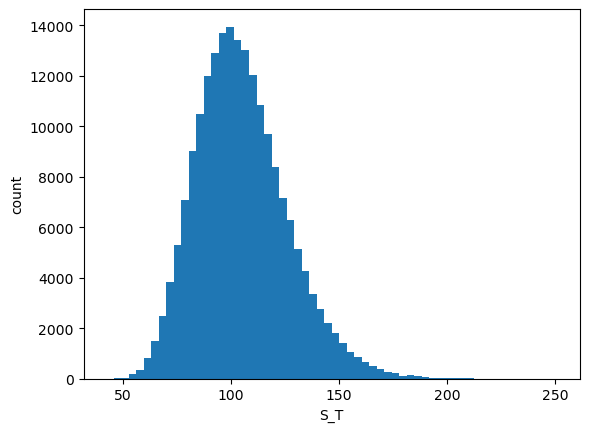

In [19]:
ST = paths[:, -1]
plt.figure()
plt.hist(ST, bins=60)
plt.xlabel("S_T")
plt.ylabel("count")
plt.show()

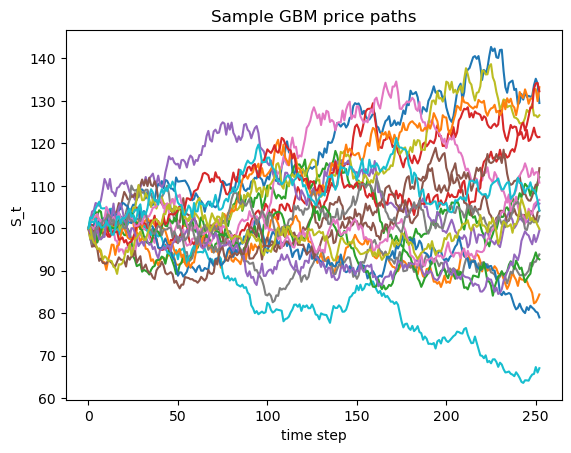

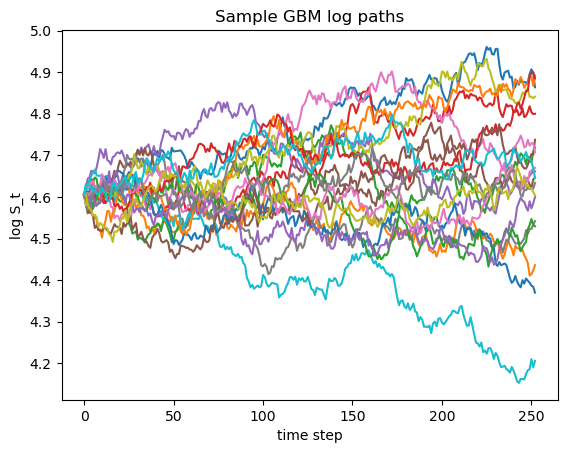

In [20]:
# Plot a small number of GBM paths (visualisation only)
n_plot = 20
paths_small = simulate_gbm_paths(
    S0, r, sigma, T, n_steps, n_plot, q=q, seed=seed
)

plt.figure()
for i in range(n_plot):
    plt.plot(paths_small[i])
plt.xlabel("time step")
plt.ylabel("S_t")
plt.title("Sample GBM price paths")
plt.show()

plt.figure()
for i in range(n_plot):
    plt.plot(np.log(paths_small[i]))
plt.xlabel("time step")
plt.ylabel("log S_t")
plt.title("Sample GBM log paths")
plt.show()